In [1]:
#importing supporting libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

#importing sklearn and tensorflow libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
import tflearn.data_utils as du
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.layers.activation import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras import optimizers
import keras.backend as K

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [4]:
#Checking for GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18035253683296704982
xla_global_id: -1
]


In [2]:
#importing data
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

In [3]:
#Separating labels and data
y_train = train_df['label']
y_test = test_df['label']

del train_df['label']
del test_df['label']

X_train = train_df.values
X_test = test_df.values

c:\Users\KPaul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequency of each label')

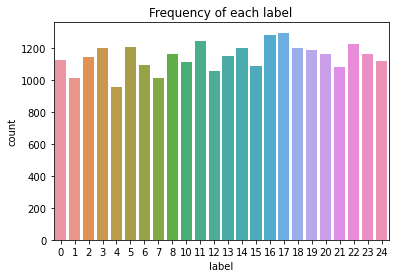

In [4]:
#Checking frequencies of the labels
sns.countplot(y_train)
plt.title("Frequency of each label")

In [5]:
#Hot-encoding the labels
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27455, 784), (27455, 24), (7172, 784), (7172, 24))

In [7]:
#Normalization
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
#Reshaping data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

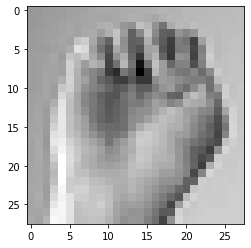

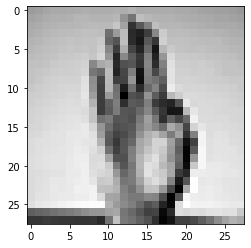

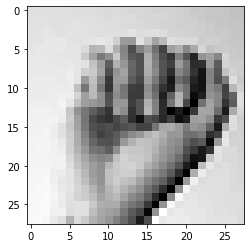

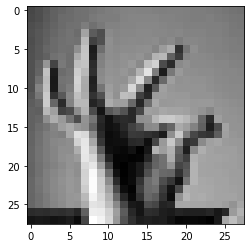

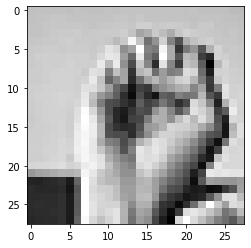

In [9]:
#Checking how the images look like
for i in range(5):
    j = random.randrange(0,len(X_train),1)
    plt.imshow(X_train[j].reshape((28,28)), cmap=plt.get_cmap('gray'))
    plt.show()

In [10]:
#Splitting data into training and validations sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((21964, 28, 28, 1), (5491, 28, 28, 1), (21964, 24), (5491, 24))

In [11]:
#Augmenting the train data in order to avoid overfitting and make the model more robust
#data_aug = ImageDataGenerator(width_shift_range = 0.15, height_shift_range = 0.15, rotation_range = 20, zoom_range = 0.15)
#data_aug.fit(X_train)

In [12]:
#batch = 136
#num_classes = len(np.unique(y_train))
#alpha_lst = [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0, 5.0, 10.0]
#activ_lst = ['relu', 'linear', 'sigmoid', 'tanh']
#l2_reg_lst = [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0, 5.0, 10.0]

In [ ]:
#Function for data augmentation
def create_datagen():
    datagen = ImageDataGenerator(width_shift_range = 0.15, height_shift_range = 0.15, rotation_range = 20, zoom_range = 0.15)
    return datagen